In [20]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [22]:
path_lbl = '/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/masks'
path_img = '/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/images'

# Get The Data
Note: For this early test we are only working with ~ 5 manually labelled images

In [23]:
fnames = get_image_files(path_img)
fnames.sort()
fnames

[PosixPath('/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/images/left_crop_0.jpg'),
 PosixPath('/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/images/left_crop_1.jpg'),
 PosixPath('/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/images/left_crop_2.jpg'),
 PosixPath('/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/images/left_crop_3.jpg'),
 PosixPath('/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/images/left_crop_4.jpg')]

In [24]:
lbl_names = get_image_files(path_lbl)
lbl_names.sort()
lbl_names

[PosixPath('/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/masks/left_crop_0.jpg'),
 PosixPath('/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/masks/left_crop_1.jpg'),
 PosixPath('/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/masks/left_crop_2.jpg'),
 PosixPath('/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/masks/left_crop_3.jpg'),
 PosixPath('/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/masks/left_crop_4.jpg')]

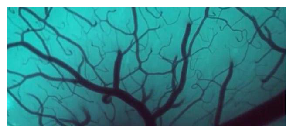

In [25]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

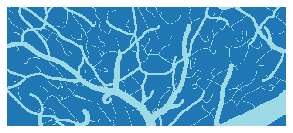

In [26]:
mask = open_mask(lbl_names[0])
mask.show(figsize=(5,5), alpha=1)

In [27]:
src_size = np.array(mask.shape[1:])
src_size, mask.data

(array([273, 640]),
 tensor([[[0, 1, 0,  ..., 0, 0, 0],
          [1, 0, 0,  ..., 0, 0, 0],
          [0, 2, 4,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [29]:
codes = np.loadtxt('/home/andrew/Github/neuralink-bot/Semantic_Segmentation/data/codes.txt',
                   dtype=str); codes

array(['brain', 'vessel'], dtype='<U6')

In [30]:
suze = src_size//2

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=4, have 0MB of GPU RAM free


In [33]:
torch.cuda.device(0)
torch.cuda.device_count()
torch.cuda.get_device_name(0)

AssertionError: 
The NVIDIA driver on your system is too old (found version 9000).
Please update your GPU driver by downloading and installing a new
version from the URL: http://www.nvidia.com/Download/index.aspx
Alternatively, go to: https://pytorch.org to install
a PyTorch version that has been compiled with your version
of the CUDA driver.